# Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
·All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


In [105]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

#importing important metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [106]:
Studgrade_pred=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
Studgrade_pred

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


This data set has 571 rows and 43 columns.
CGPA column is our target variable and rest all are our features.

In [107]:
Studgrade_pred.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [108]:
Studgrade_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

All columns are categorical data except CGPA. Its a only numerical column present in the dataset.

In [109]:
Studgrade_pred.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There are null values in columns CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412 

In [110]:
#The seat number does not impact the target variable ,hence we can drop it.

Studgrade_pred.drop(['Seat No.'],axis=1,inplace=True)

In [111]:
Studgrade_pred.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


Filling Missing Values

In [112]:
for col in Studgrade_pred.columns:
    Studgrade_pred[col].fillna(Studgrade_pred[col].mode()[0], inplace=True)

In [113]:
Studgrade_pred.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Now there are no null values in the dataset

## EDA Analysis

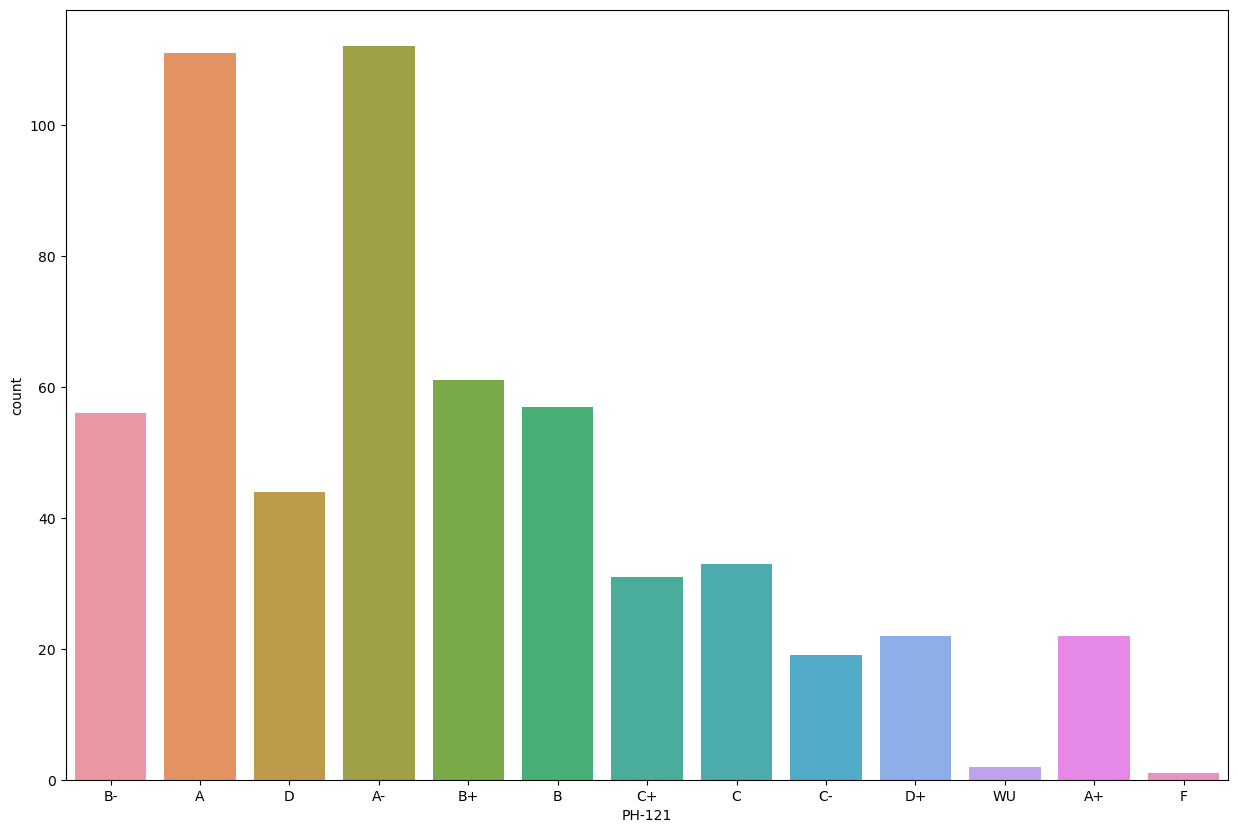

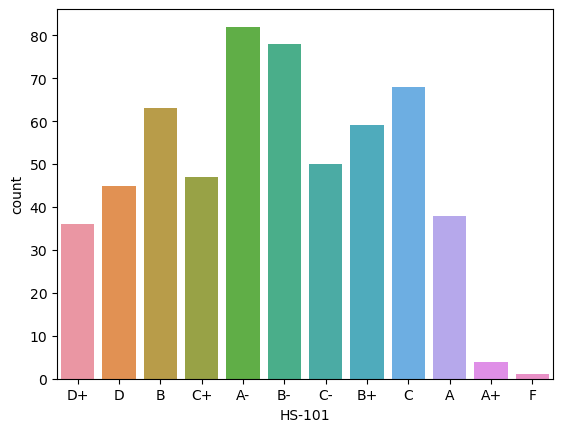

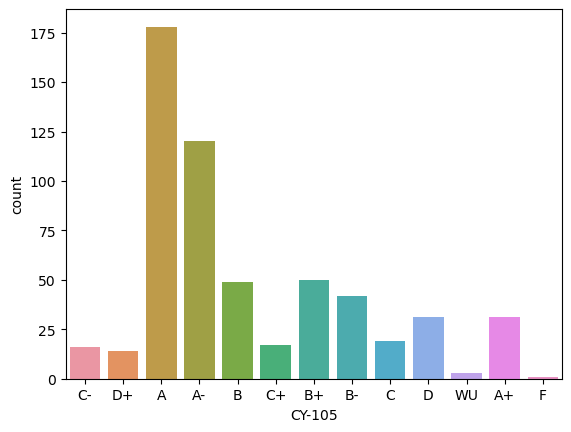

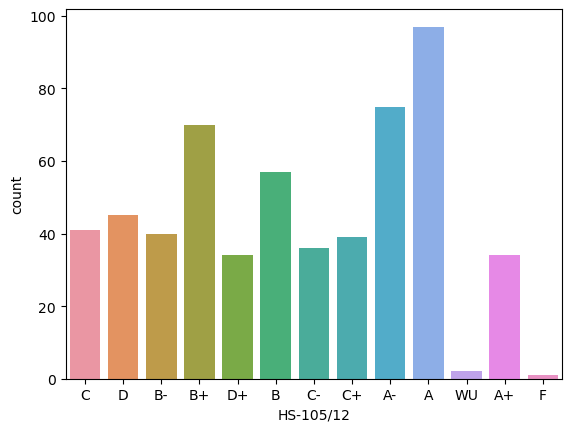

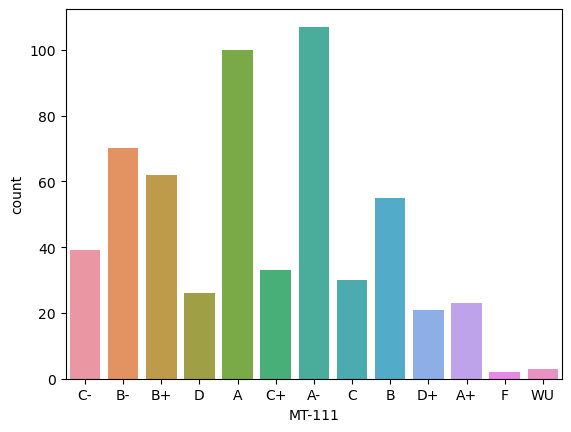

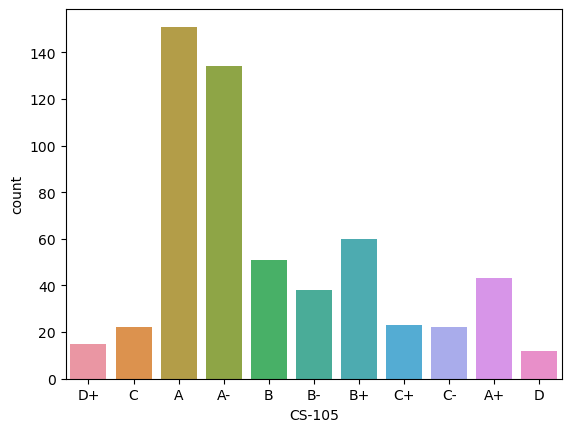

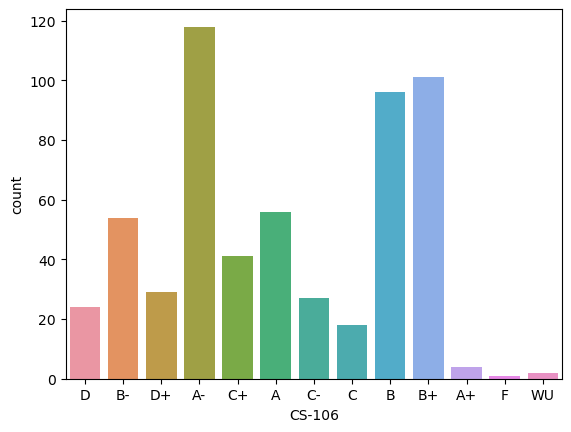

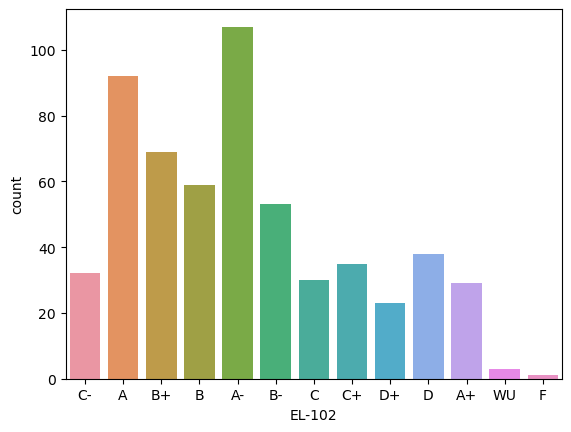

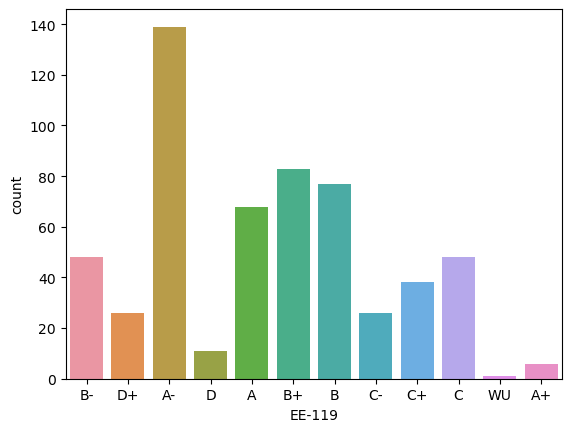

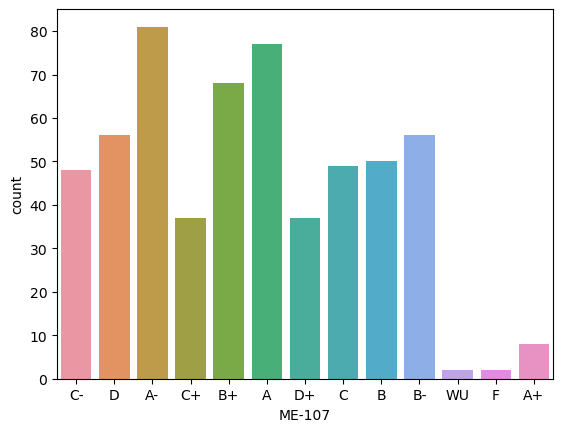

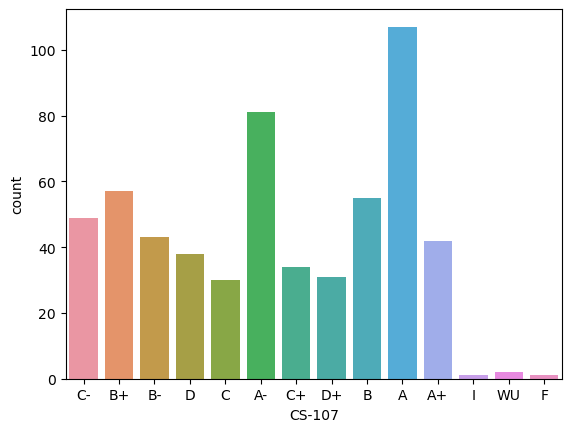

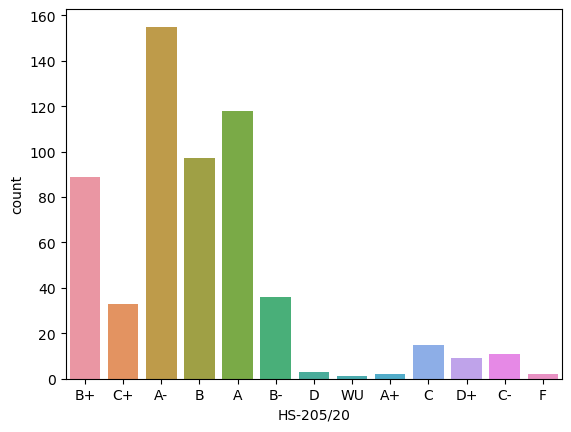

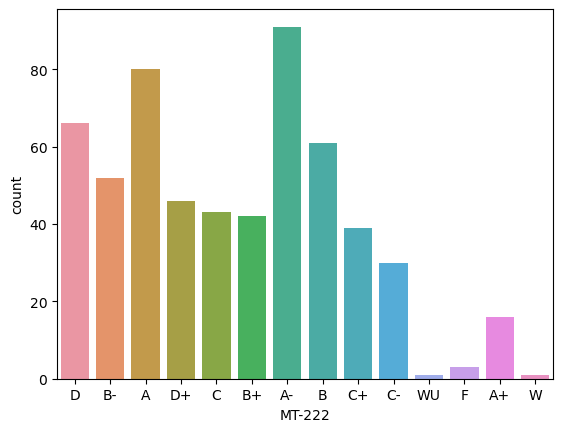

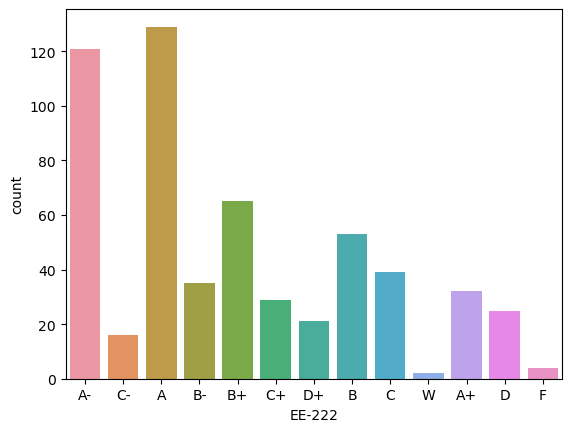

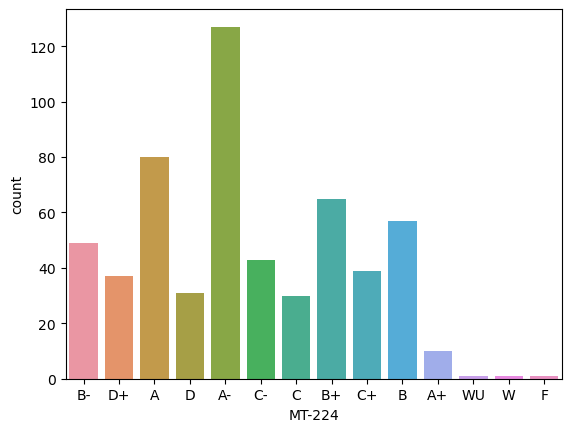

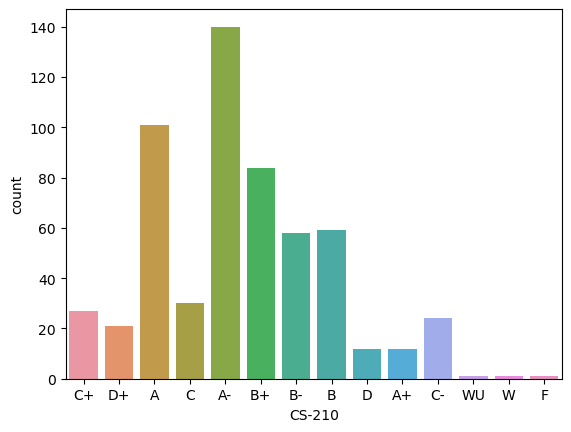

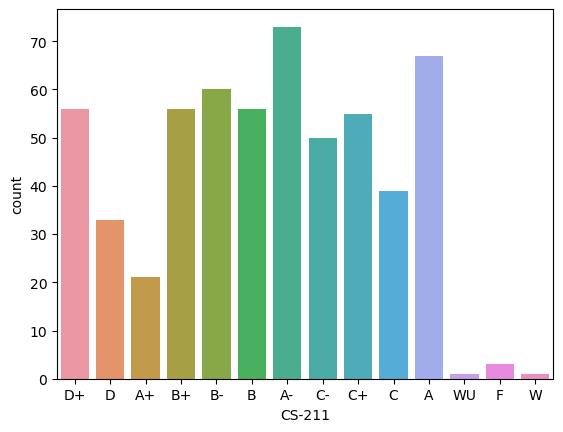

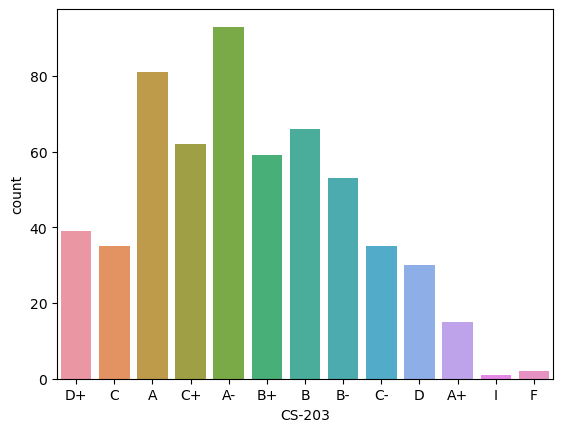

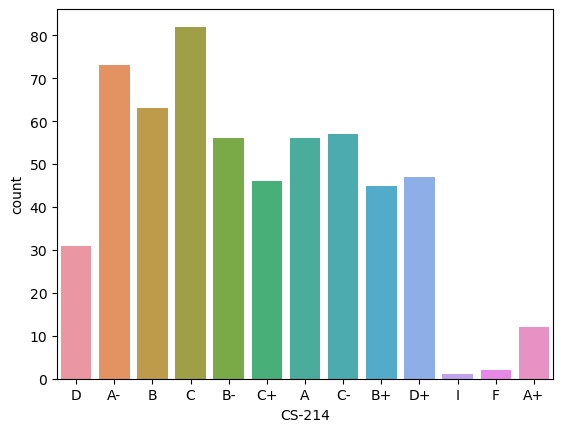

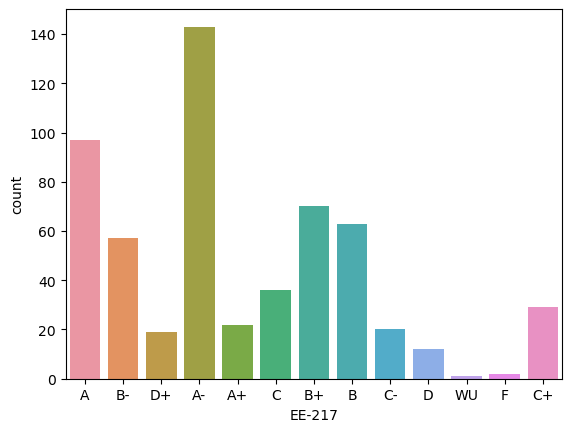

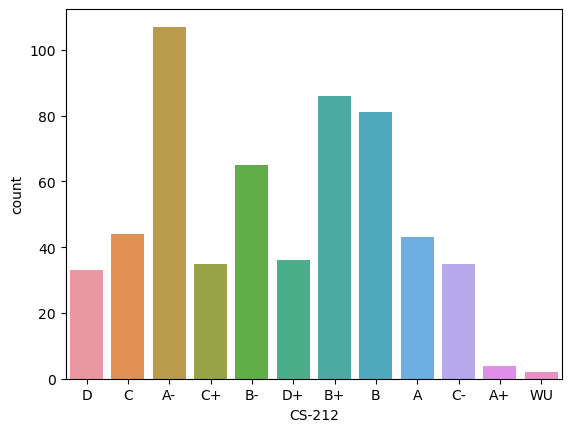

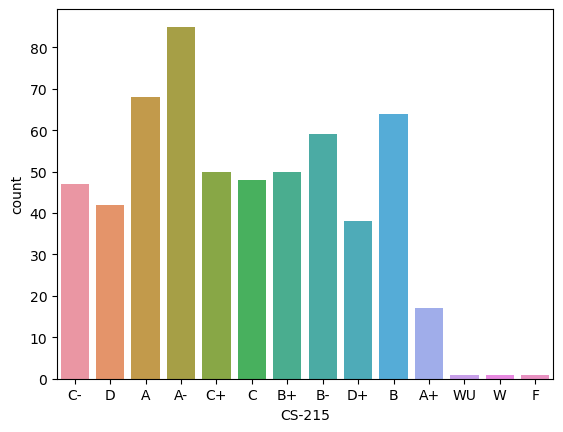

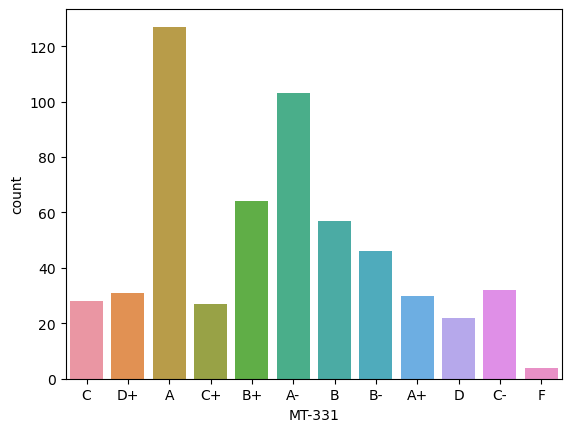

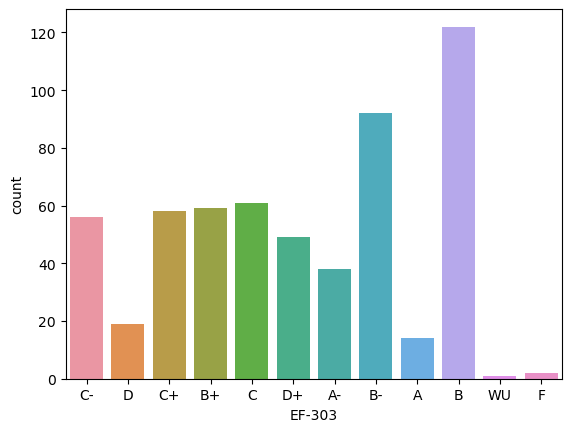

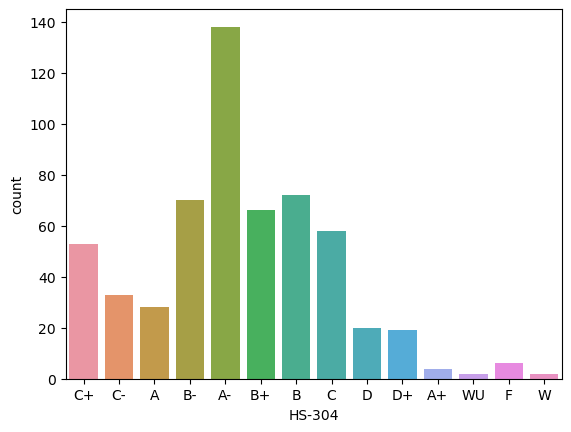

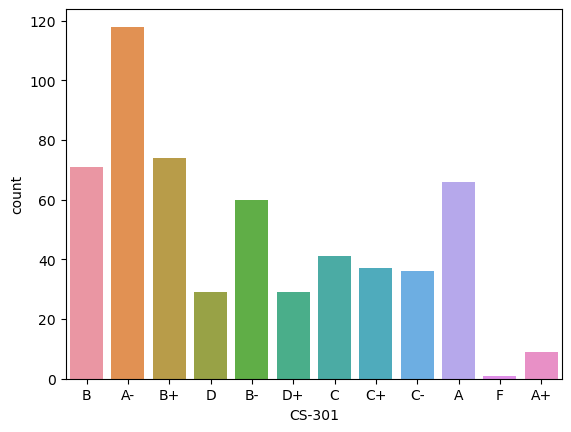

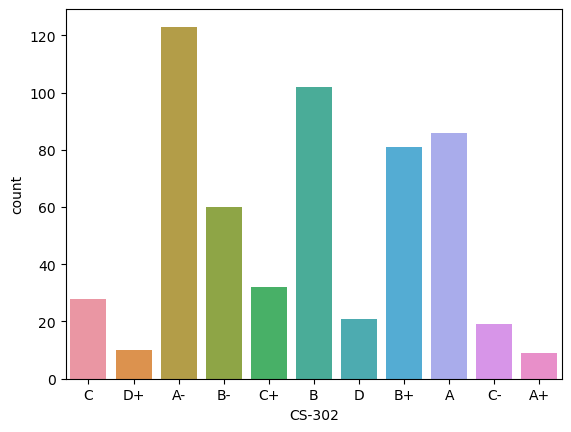

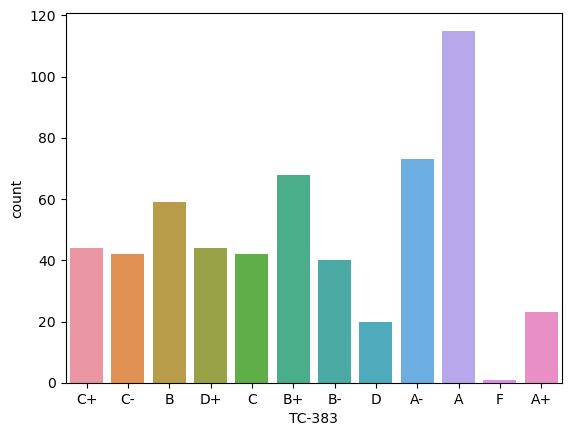

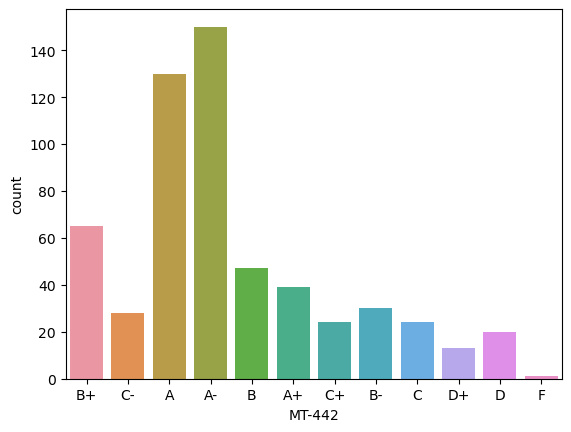

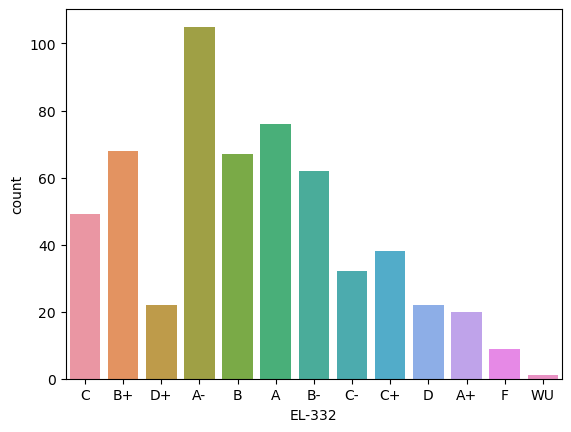

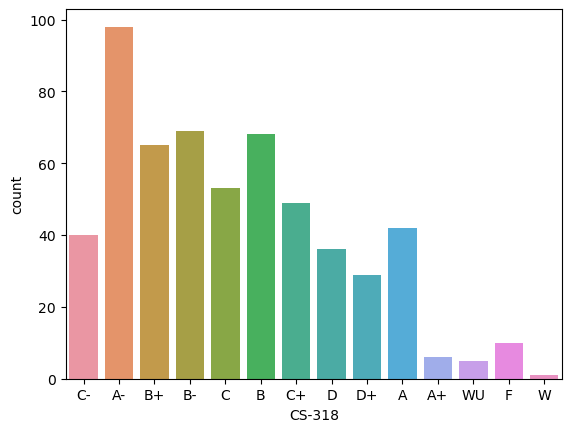

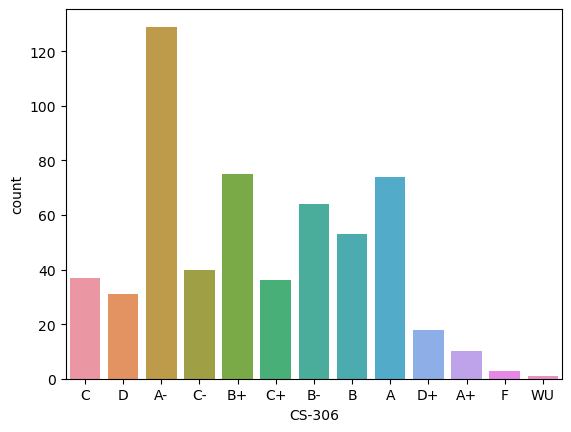

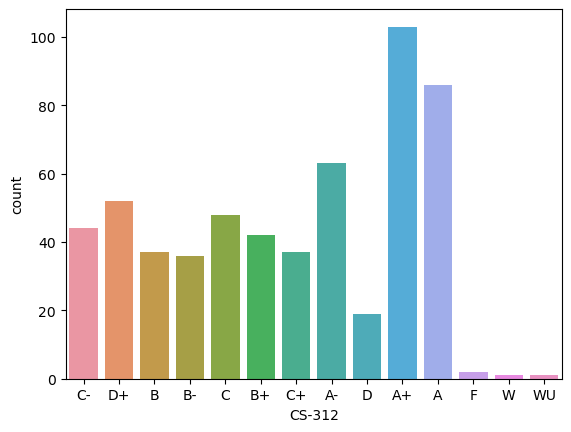

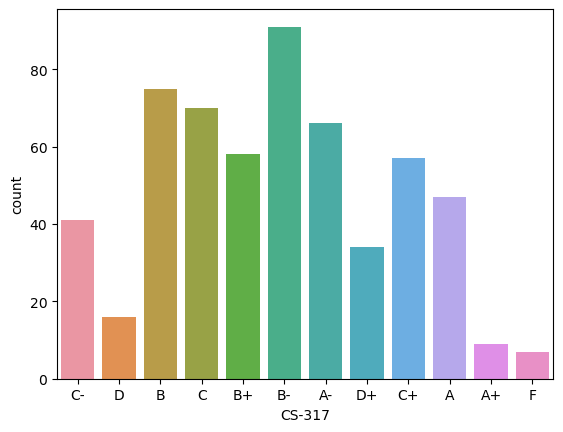

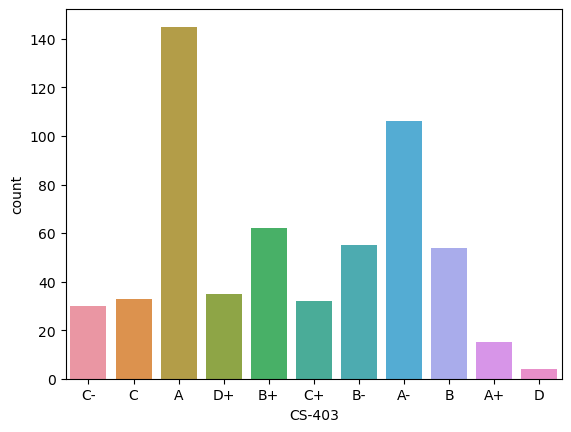

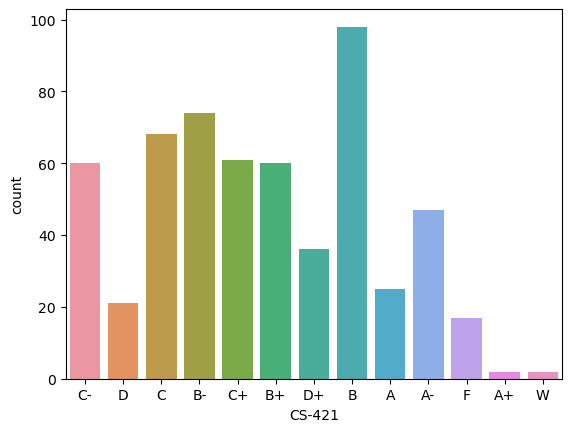

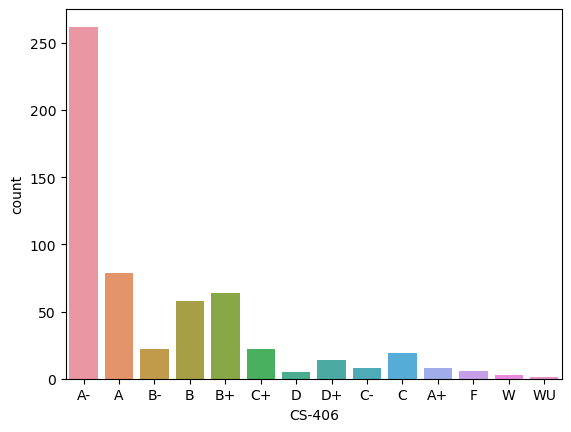

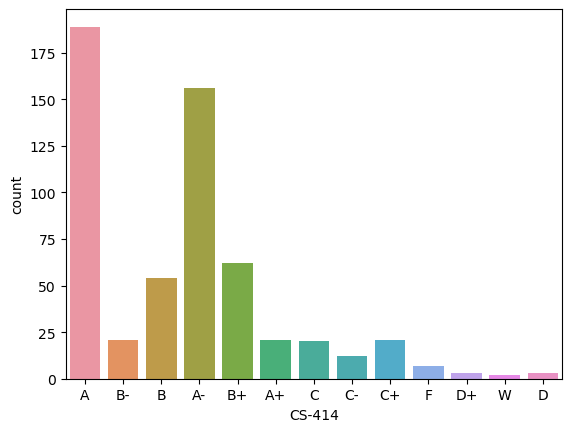

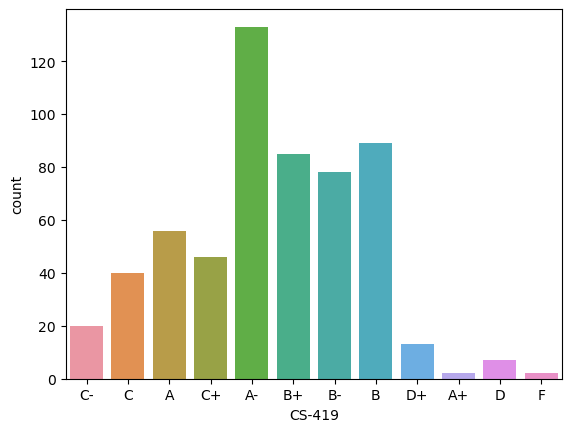

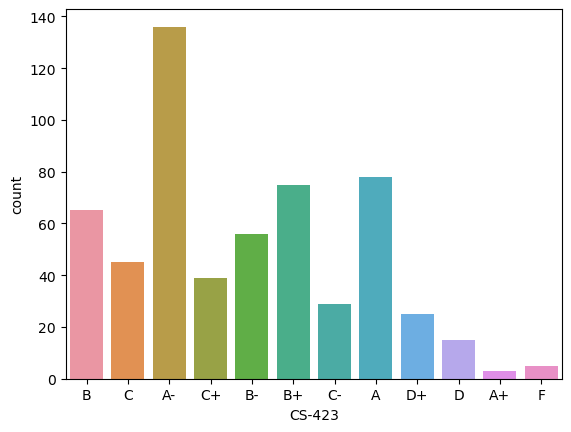

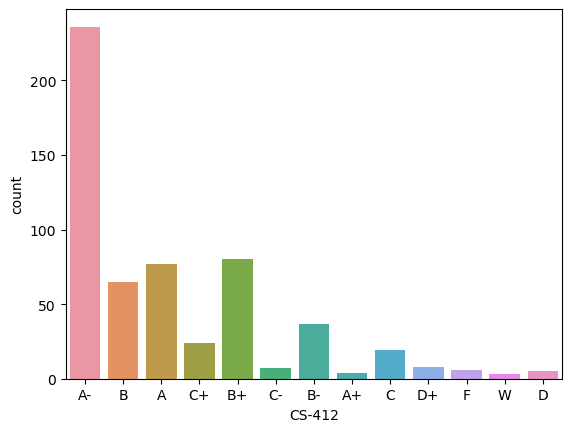

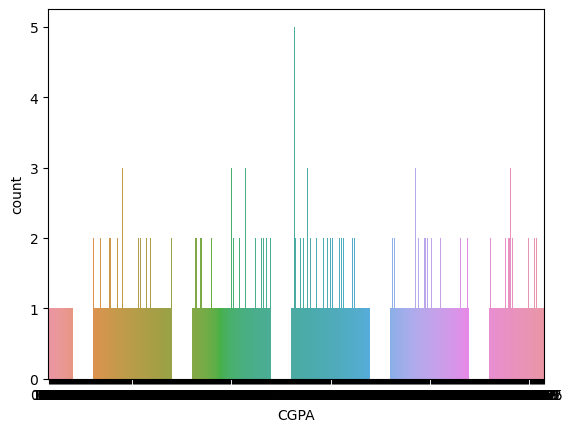

In [114]:

    
plt.figure(figsize=(15,10))
for col in Studgrade_pred.columns:

        sns.countplot(x=Studgrade_pred[col],data=Studgrade_pred)
        plt.show()

### As we observed in count plot, majority are in A-/A/B/B-.

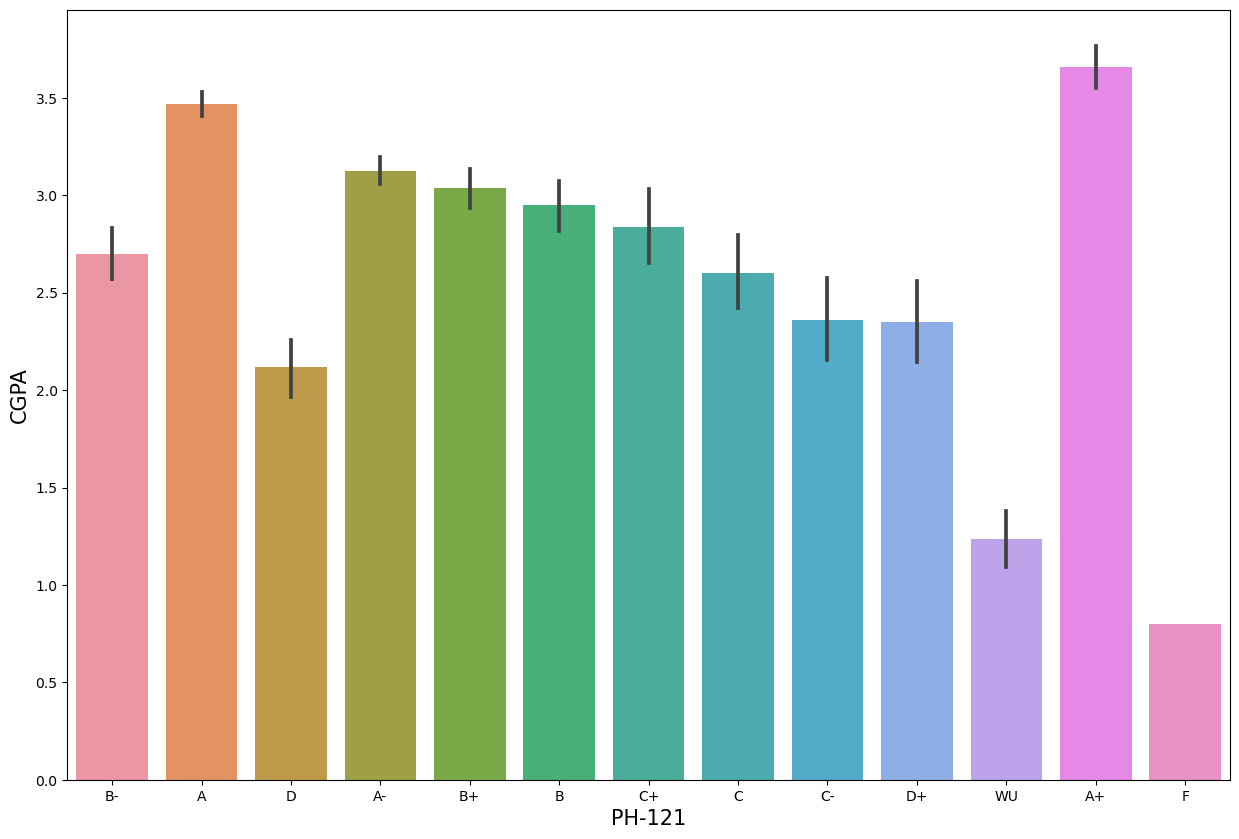

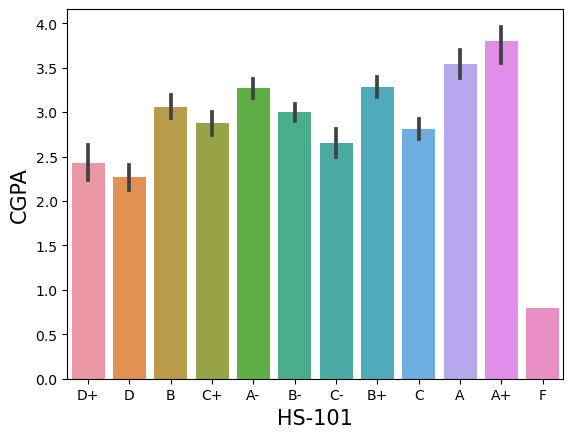

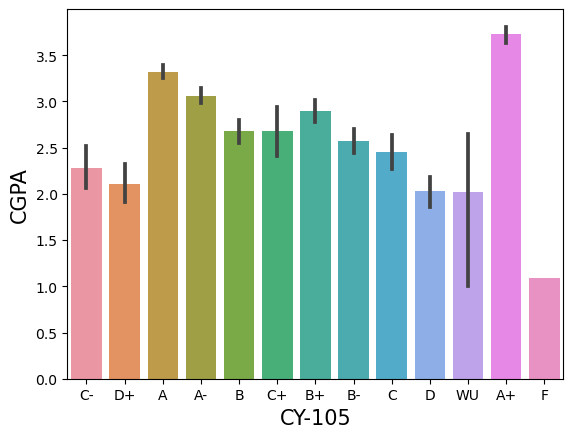

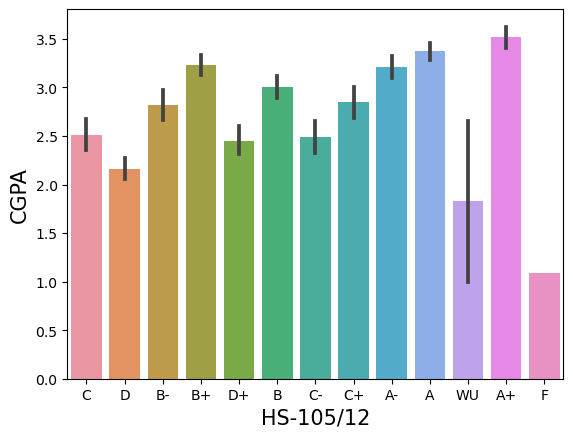

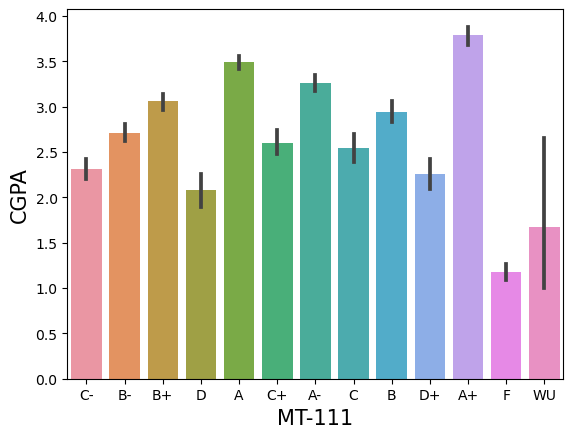

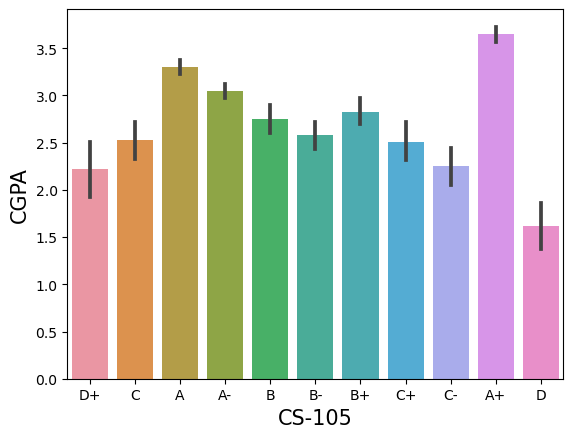

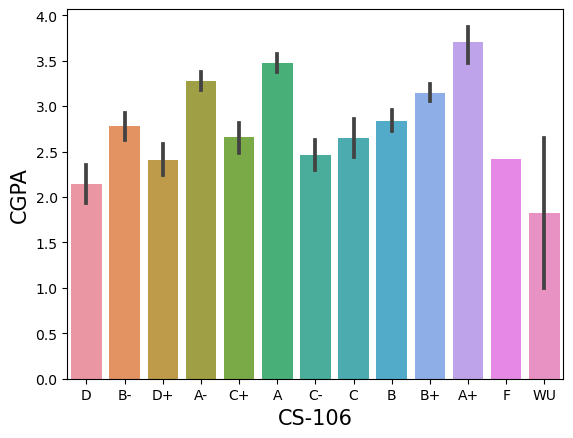

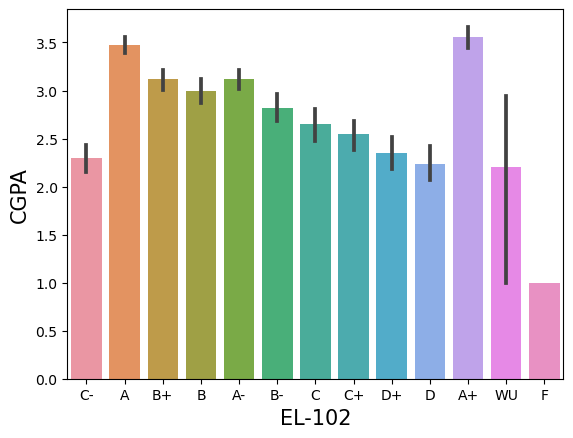

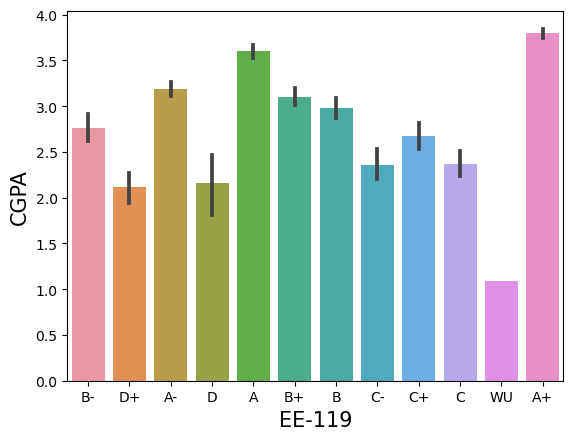

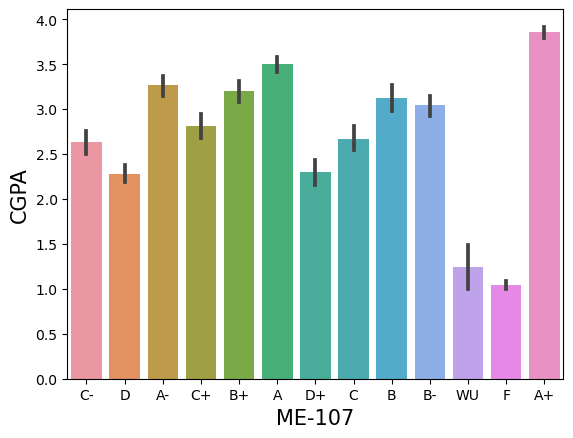

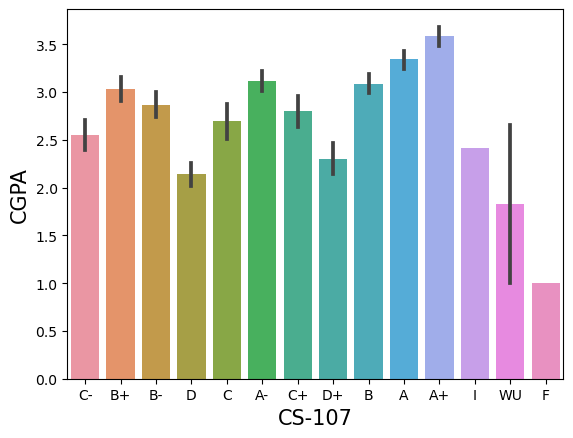

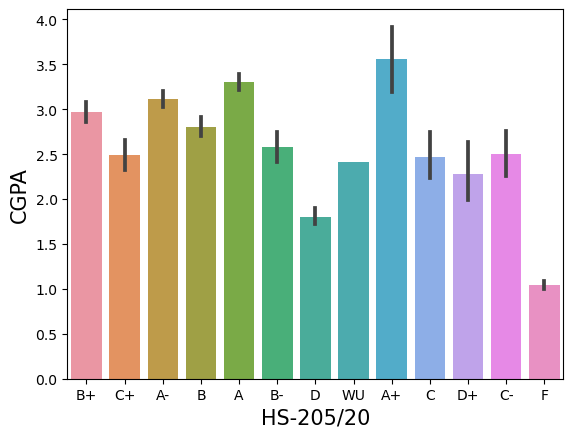

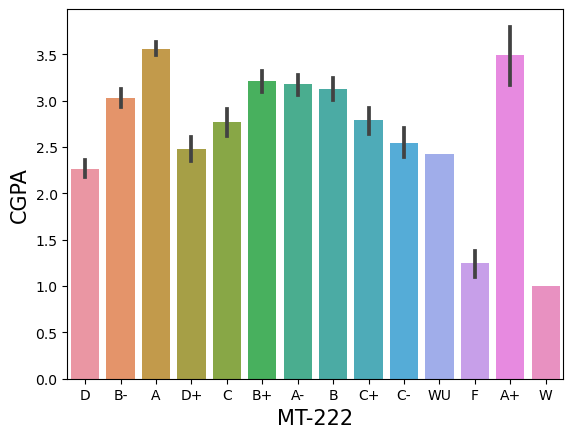

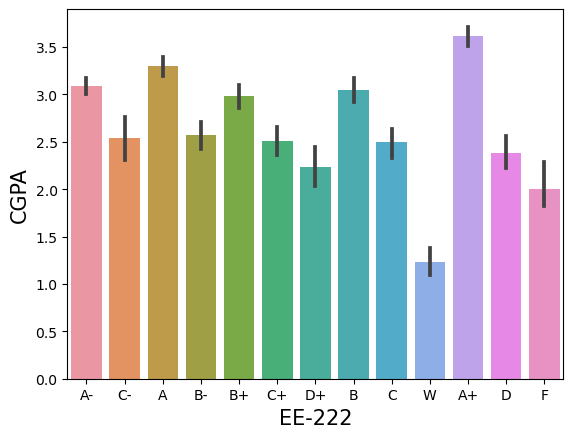

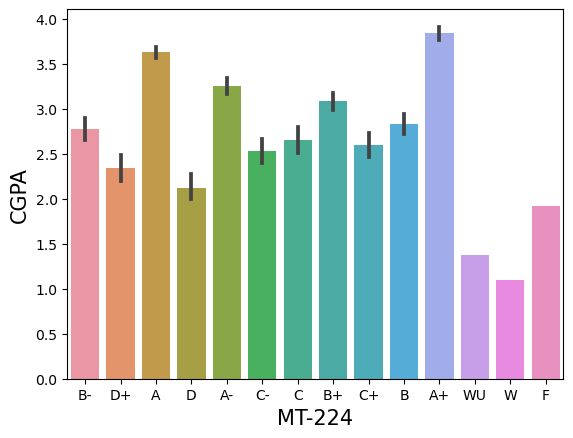

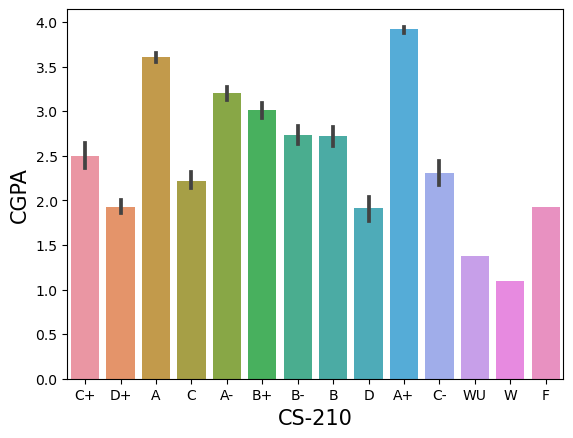

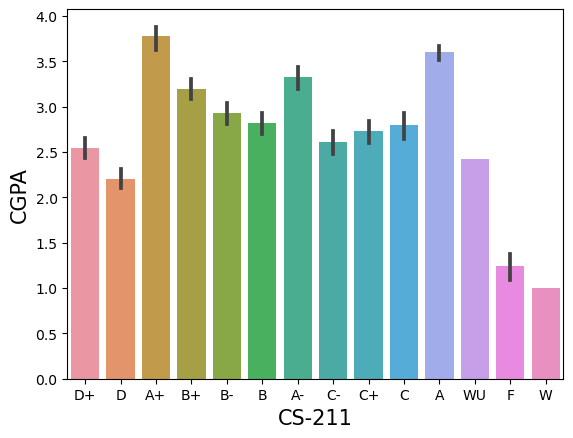

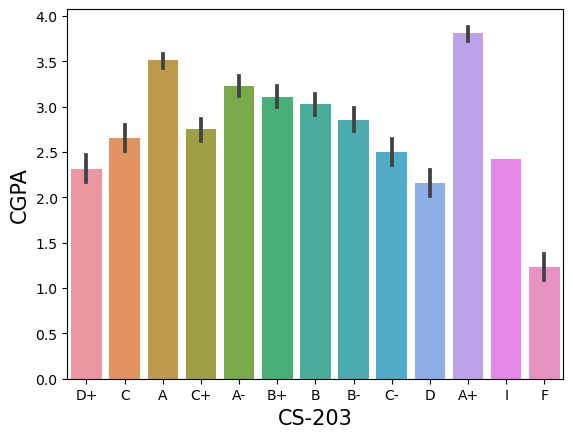

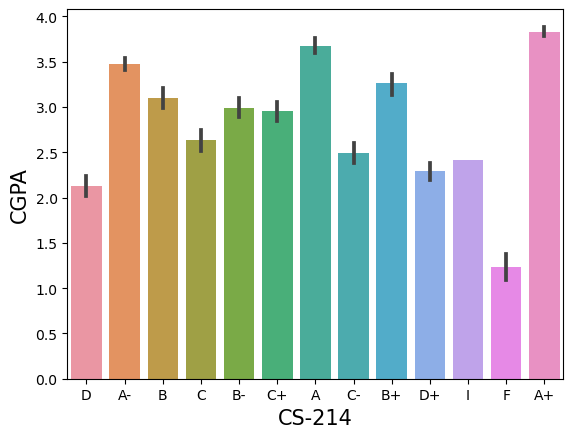

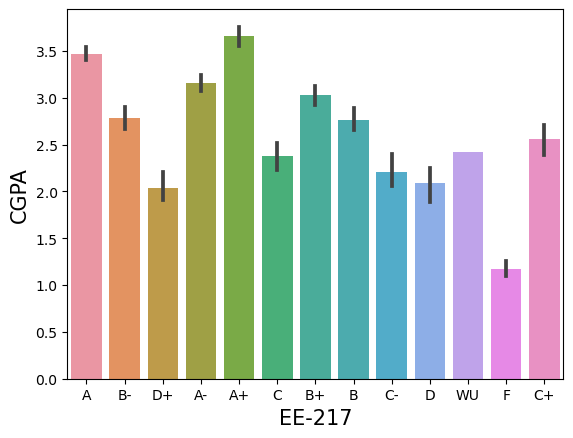

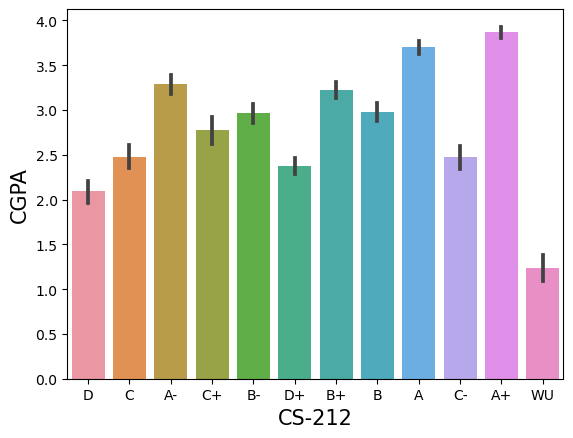

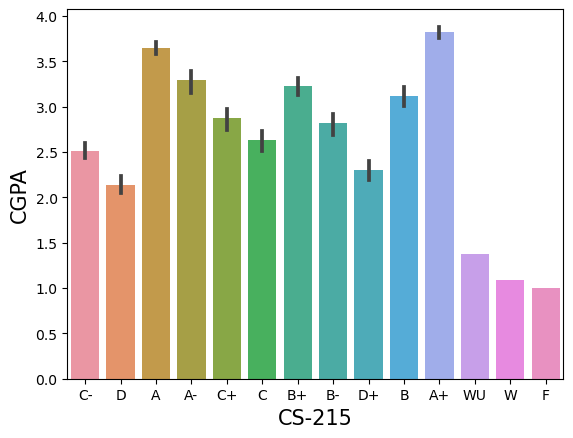

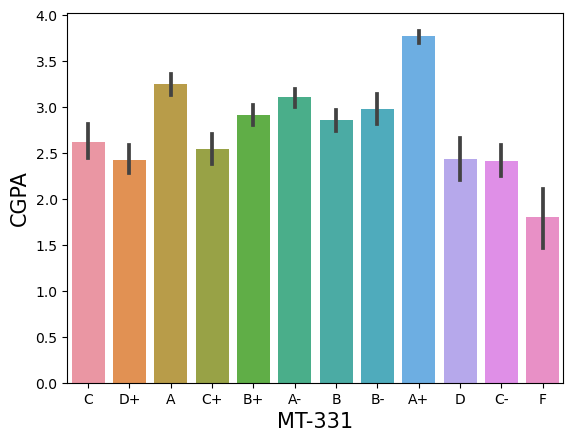

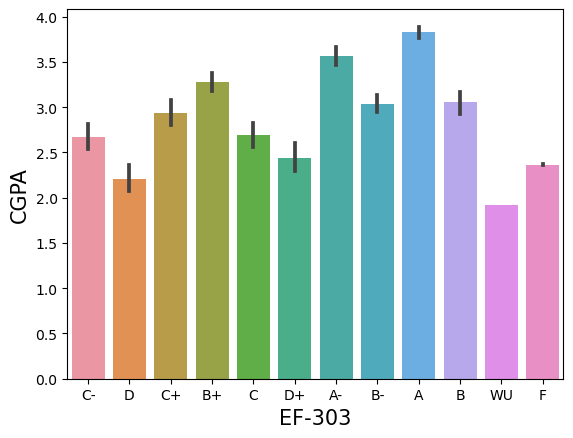

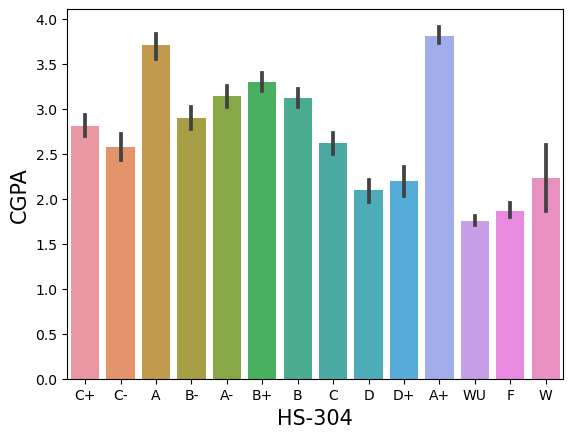

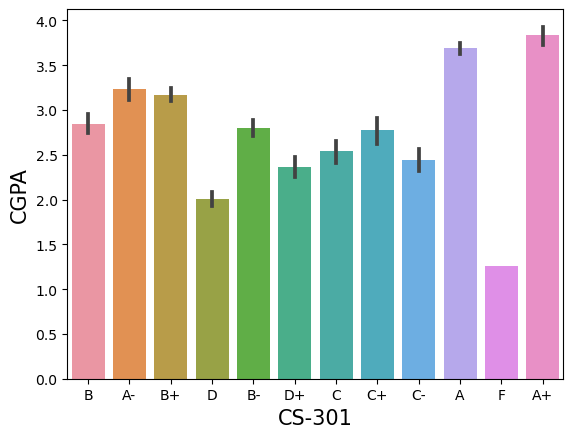

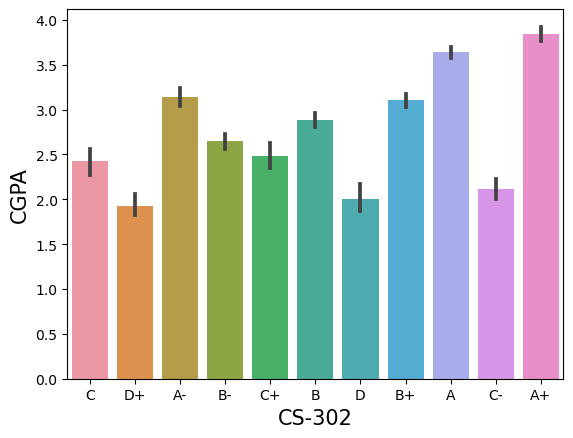

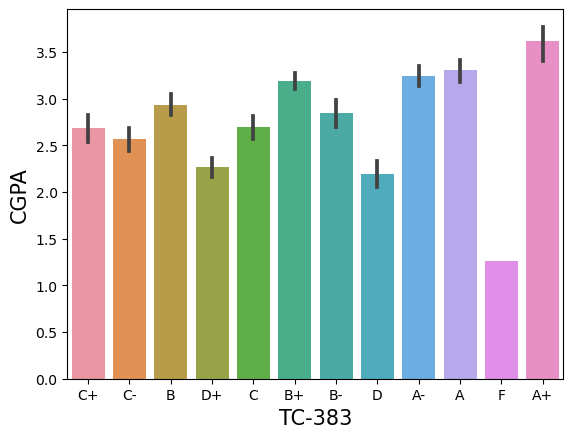

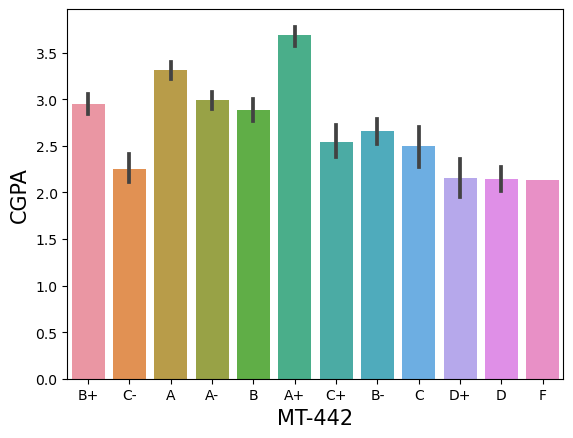

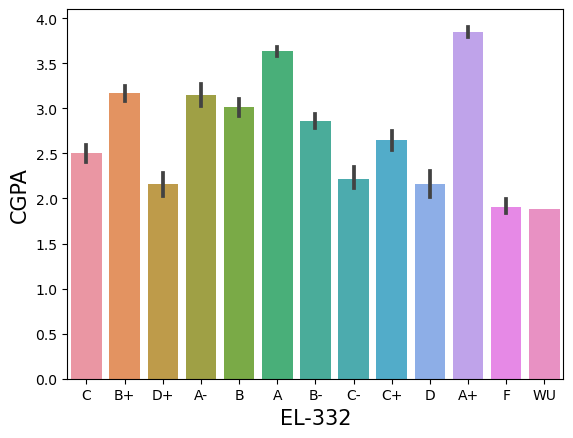

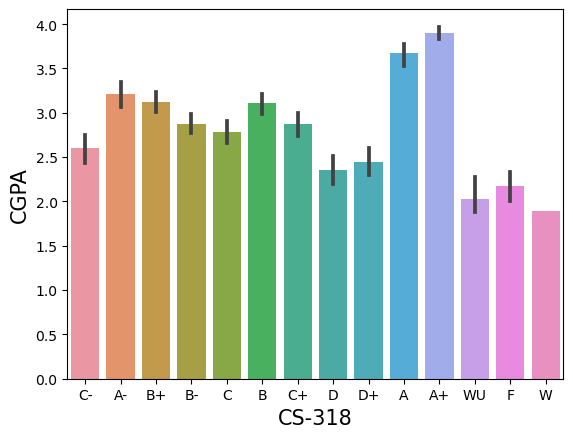

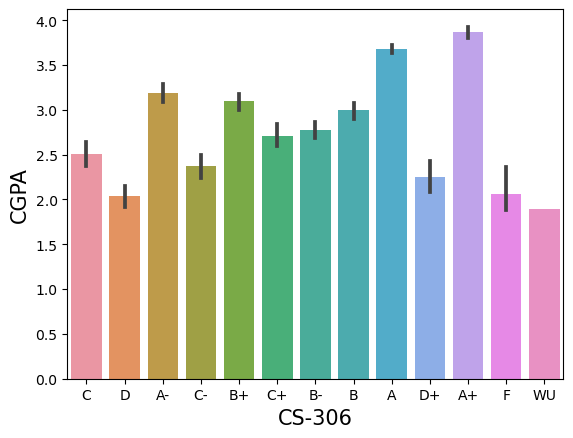

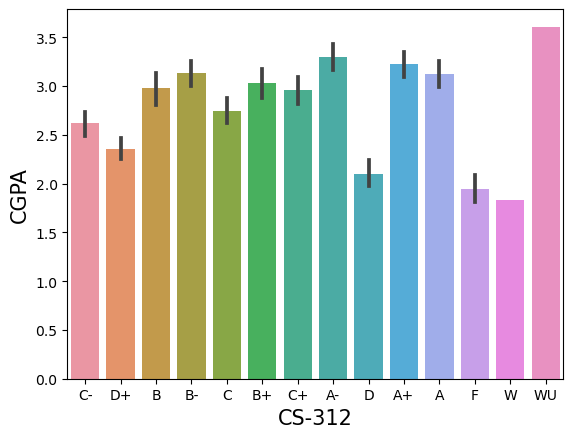

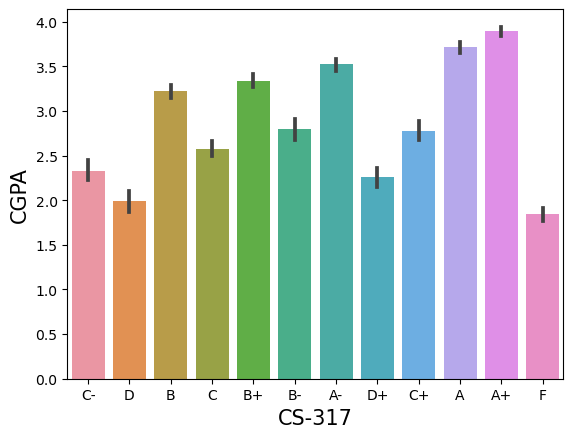

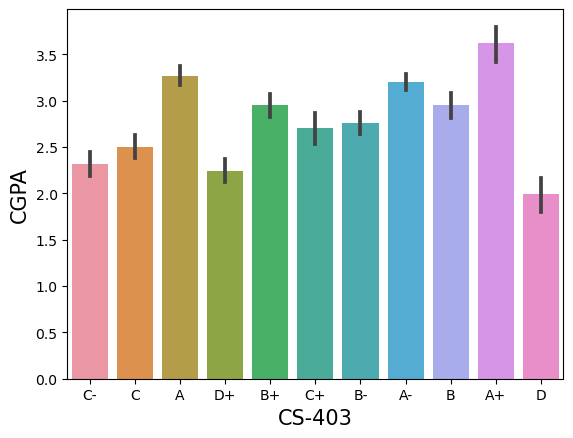

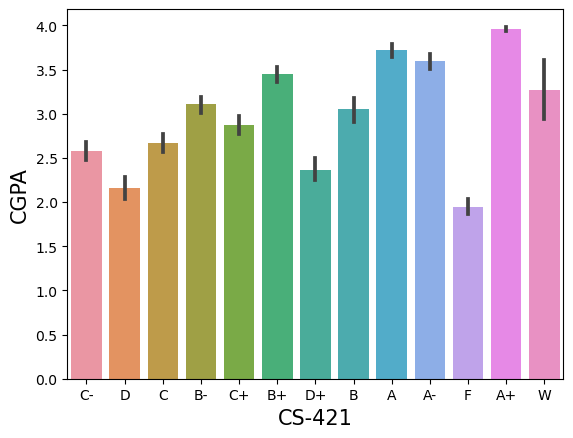

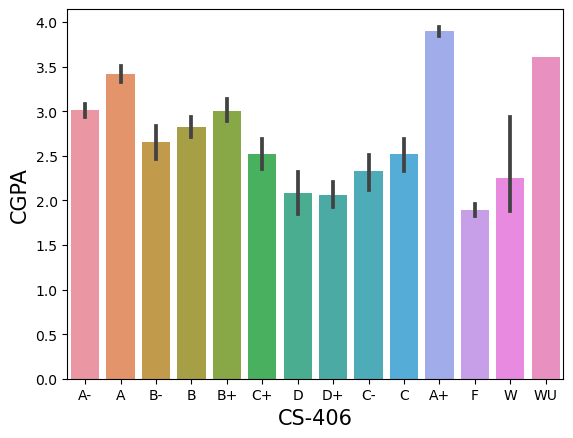

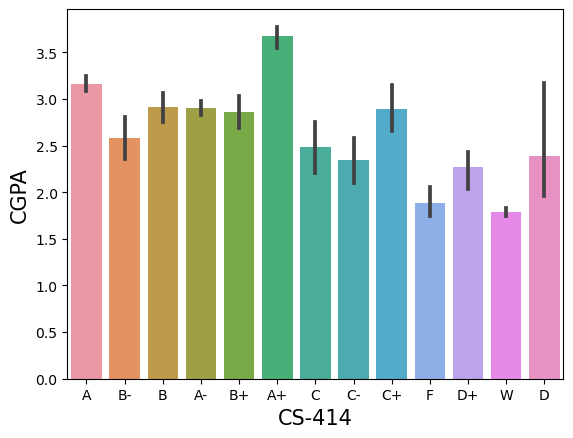

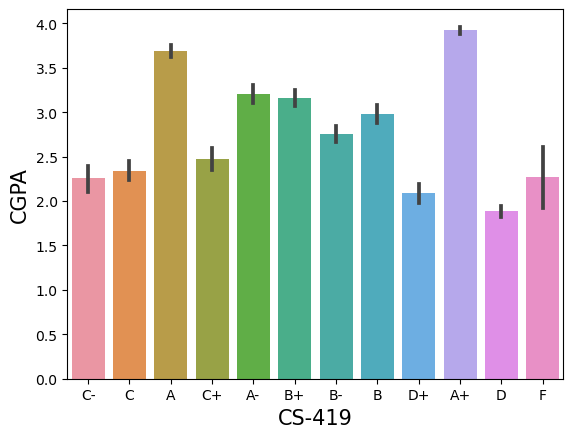

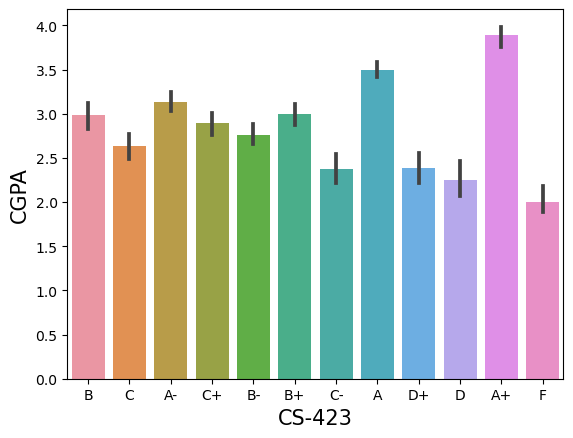

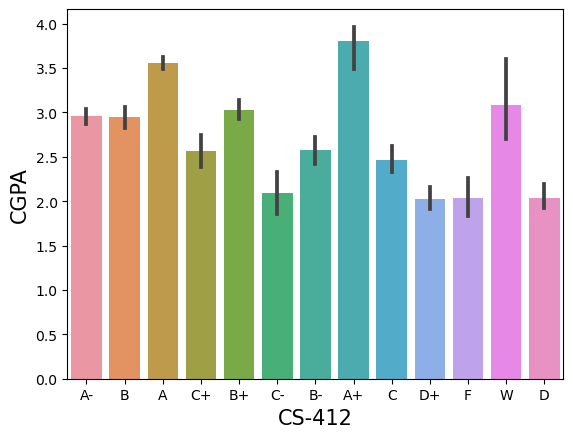

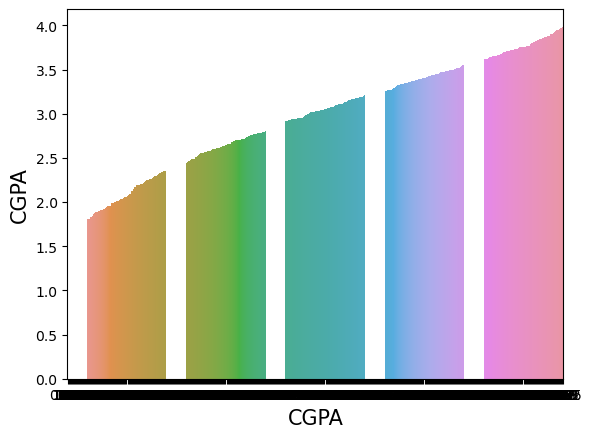

In [115]:
plt.figure(figsize=(15,10))
for col in Studgrade_pred.columns:
    
    sns.barplot(x=Studgrade_pred[col],y=Studgrade_pred['CGPA'],data=Studgrade_pred)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('CGPA',fontsize=15)
    plt.show()

In [116]:
for i in Studgrade_pred.columns:
    x = Studgrade_pred[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64

Column name is: HS-101 and it value is:
 HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64

Column name is: CY-105 and it value is:
 CY-105
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64

Column name is: HS-105/12 and it value is:
 HS-105/12
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64

Column name is: MT-111 and it value is:
 MT-111
A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64

Col

## Converting Categorical Data into Numerical Data

In [117]:
le=LabelEncoder()
for i in Studgrade_pred.drop(['CGPA'],axis=1):
    Studgrade_pred[i]=le.fit_transform(Studgrade_pred[i])
Studgrade_pred

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


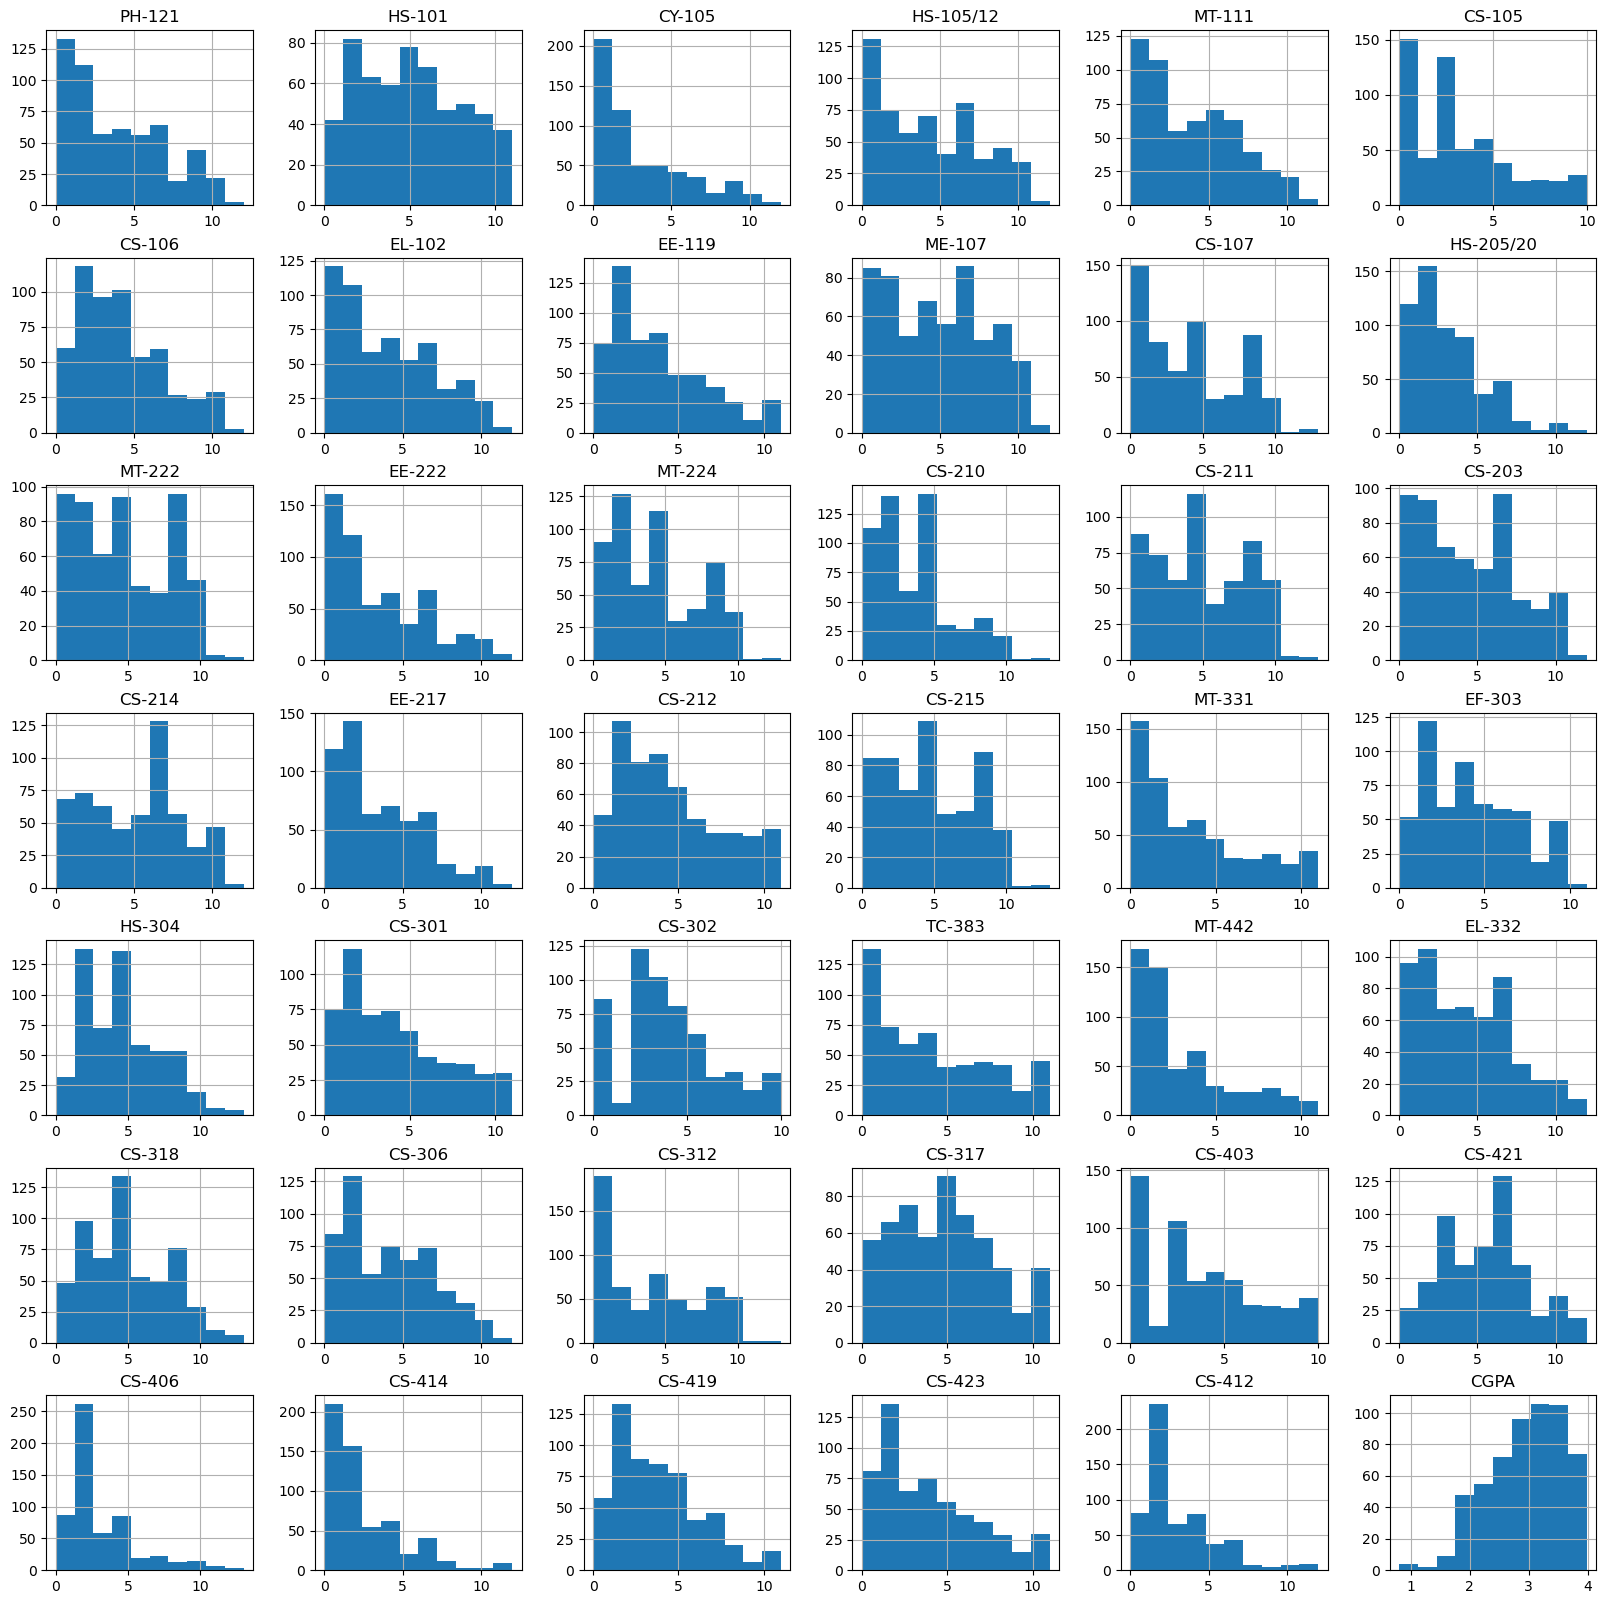

In [118]:
Studgrade_pred.hist(figsize=(20,20))
plt.show()

PH-121          Axes(0.125,0.836742;0.065678x0.0432584)
HS-101       Axes(0.203814,0.836742;0.065678x0.0432584)
CY-105       Axes(0.282627,0.836742;0.065678x0.0432584)
HS-105/12    Axes(0.361441,0.836742;0.065678x0.0432584)
MT-111       Axes(0.440254,0.836742;0.065678x0.0432584)
CS-105       Axes(0.519068,0.836742;0.065678x0.0432584)
CS-106       Axes(0.597881,0.836742;0.065678x0.0432584)
EL-102       Axes(0.676695,0.836742;0.065678x0.0432584)
EE-119       Axes(0.755508,0.836742;0.065678x0.0432584)
ME-107       Axes(0.834322,0.836742;0.065678x0.0432584)
CS-107          Axes(0.125,0.784831;0.065678x0.0432584)
HS-205/20    Axes(0.203814,0.784831;0.065678x0.0432584)
MT-222       Axes(0.282627,0.784831;0.065678x0.0432584)
EE-222       Axes(0.361441,0.784831;0.065678x0.0432584)
MT-224       Axes(0.440254,0.784831;0.065678x0.0432584)
CS-210       Axes(0.519068,0.784831;0.065678x0.0432584)
CS-211       Axes(0.597881,0.784831;0.065678x0.0432584)
CS-203       Axes(0.676695,0.784831;0.065678x0.0

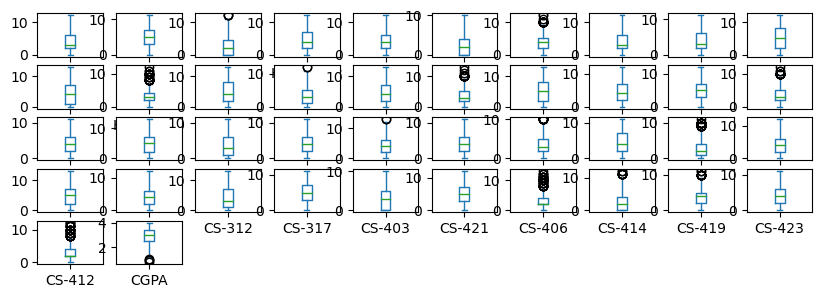

In [119]:
Studgrade_pred.plot(kind='box',subplots=True,layout=(15,10),figsize=(10,10))

Outliers are present in columns such as CS-406,CS-414,Cs-412 etc....

In [123]:
Studgrade_pred.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


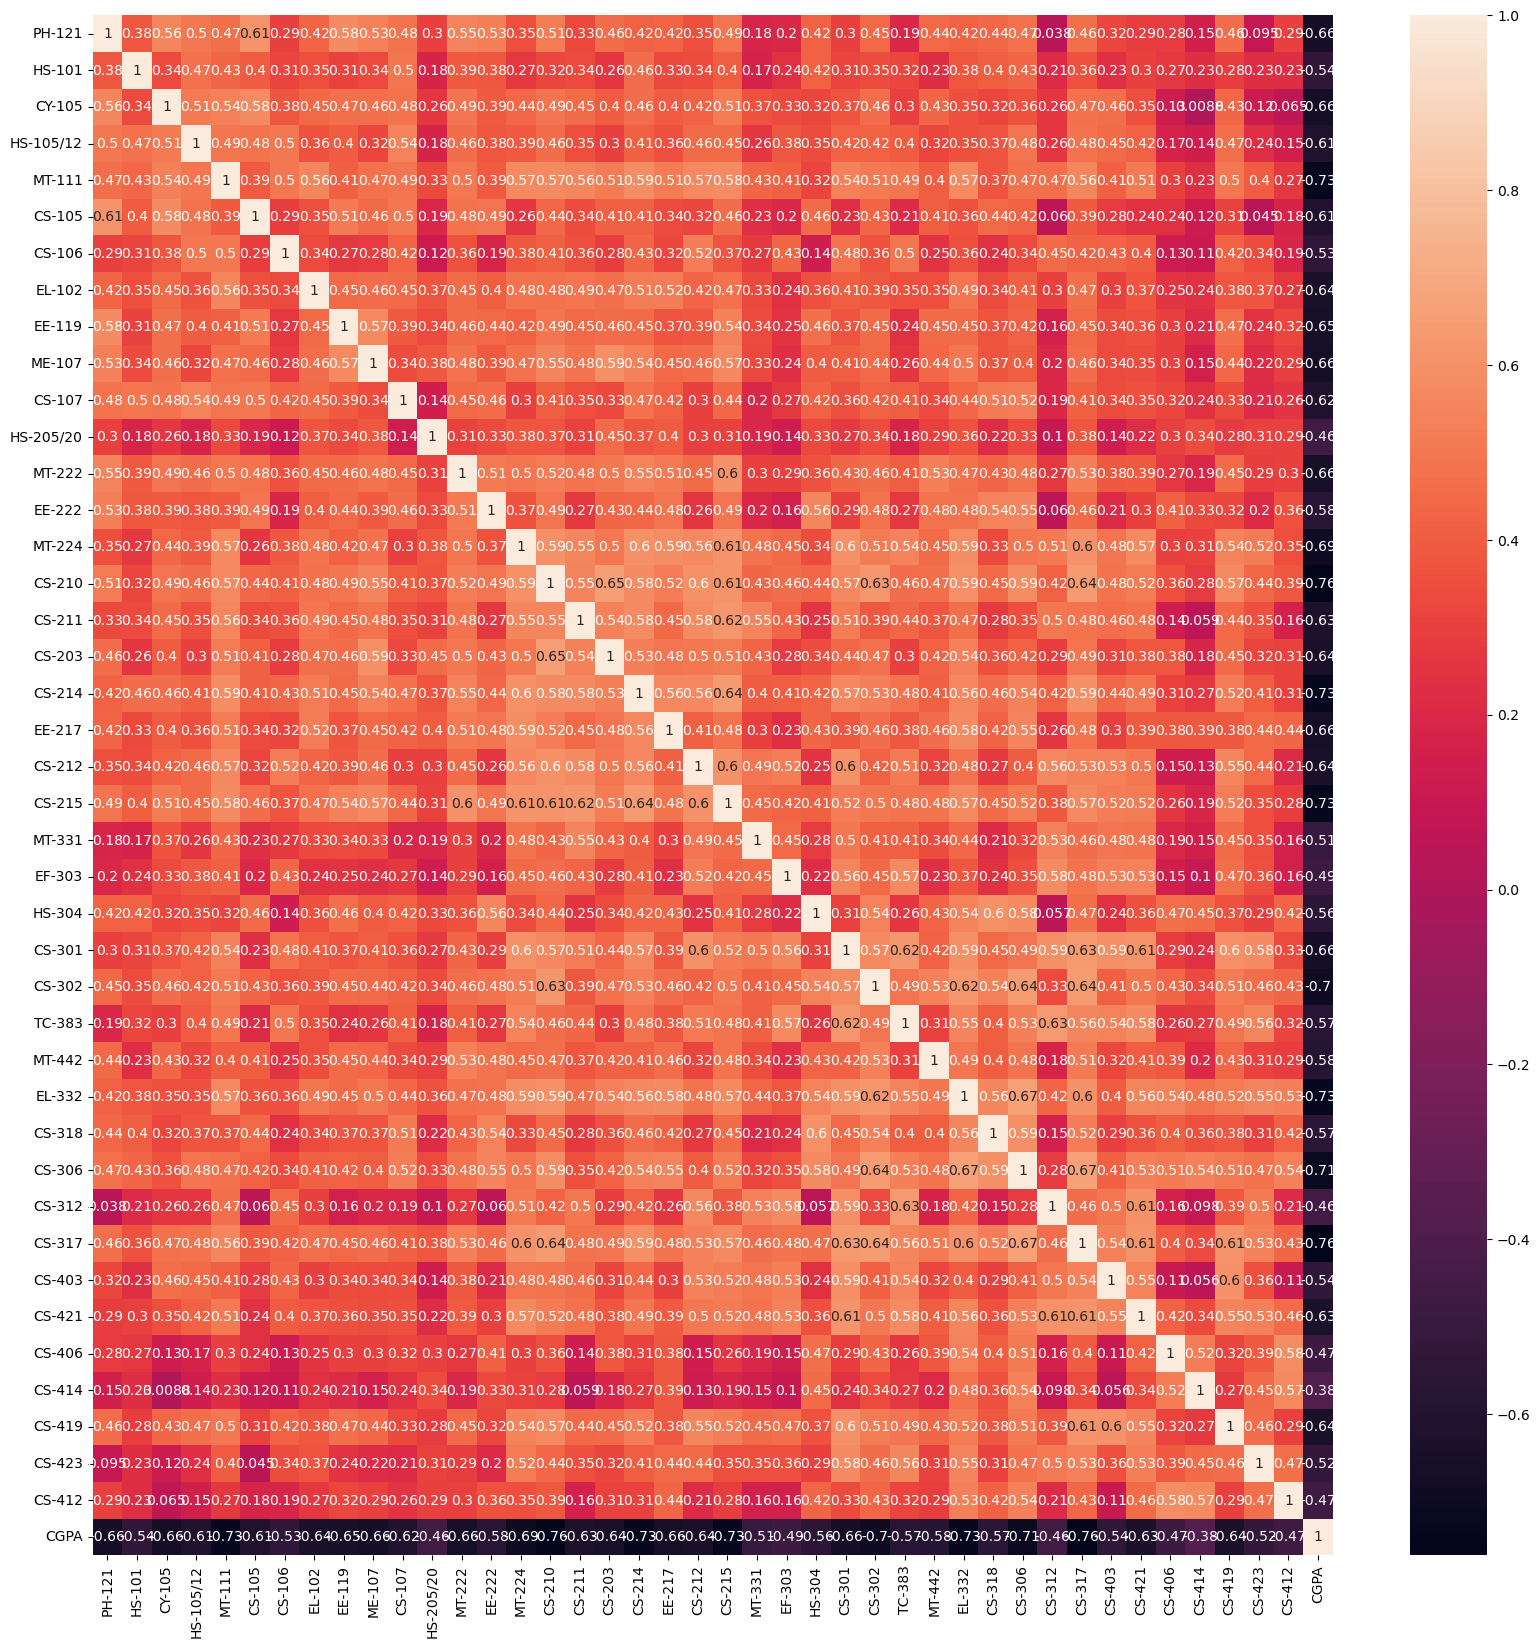

In [124]:
plt.figure(figsize=(20,20))
sns.heatmap(Studgrade_pred.corr(),annot=True)
plt.show()

In [125]:
Studgrade_pred.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


## Removing Outliers

In [126]:
from scipy.stats import zscore
z=np.abs(zscore(Studgrade_pred))
threshold=3
np.where(z>3)
Studgrade_pred=Studgrade_pred[(z<3).all(axis=1)]
Studgrade_pred

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2,9,0,6,4,4,6,2,5,9,...,3,7,4,10,6,8,3,6,5,2.607
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470


## Data Splitting

In [128]:
x=Studgrade_pred.drop(['CGPA'],axis=1)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2,9,0,6,4,4,6,2,5,9,...,8,3,7,4,10,6,8,3,6,5
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2


In [129]:
y=Studgrade_pred.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
564    2.607
566    3.798
567    3.772
568    3.470
569    2.193
Name: CGPA, Length: 540, dtype: float64

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [131]:
Lr=LinearRegression()
knn=KNeighborsRegressor()
Dtr=DecisionTreeRegressor()
Bag=BaggingRegressor()
Rfg=RandomForestRegressor()
Ada=AdaBoostRegressor()
Gbr=GradientBoostingRegressor()
svr=SVR()
lasso=Lasso()
ridge=Ridge()
model=(Lr,knn,Dtr,Bag,Rfg,Ada,Gbr,svr,lasso,ridge)
for m in model:
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    r1=r2_score(y_test,predict)
    print('R2 score of  :',m,r1)
    print('Mean Absolute Error is :',mean_absolute_error(y_test,predict))
    print('Mean Squared Error is :',mean_squared_error(y_test,predict))
    print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,predict)))
    print('\n')

R2 score of  : LinearRegression() 0.9764068927719277
Mean Absolute Error is : 0.05796412851462687
Mean Squared Error is : 0.006821229323228001
Root Mean Squared Error is : 0.08259073388236722


R2 score of  : KNeighborsRegressor() 0.9646107462162599
Mean Absolute Error is : 0.07853518518518515
Mean Squared Error is : 0.010231726296296295
Root Mean Squared Error is : 0.10115199600747528


R2 score of  : DecisionTreeRegressor() 0.7976407619526014
Mean Absolute Error is : 0.16931481481481486
Mean Squared Error is : 0.05850601851851854
Root Mean Squared Error is : 0.2418801738847534


R2 score of  : BaggingRegressor() 0.953791490490481
Mean Absolute Error is : 0.09289444444444442
Mean Squared Error is : 0.013359784999999992
Root Mean Squared Error is : 0.11558453616293138


R2 score of  : RandomForestRegressor() 0.9688507926489576
Mean Absolute Error is : 0.07575435185185168
Mean Squared Error is : 0.009005845839814805
Root Mean Squared Error is : 0.09489913508465082


R2 score of  : AdaBo

In [133]:
Model_Performance=pd.DataFrame({"Models": ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor',
                                           'AdaBoostRegressor','GradientBoostingRegressor','SVR','Lasso','Ridge'],
                          "r2 value":['0.9764068927719277','0.9646107462162599','0.7976407619526014','0.953791490490481','0.9688507926489576',
                                     '0.9055772283642954','0.9640977480298192','0.9715307238057316','0.3426012753955503','0.9764137984734649']})
Model_Performance

,Models,r2 value
0,LinearRegression,0.9764068927719277
1,KNeighborsRegressor,0.9646107462162599
2,DecisionTreeRegressor,0.7976407619526014
3,BaggingRegressor,0.953791490490481
4,RandomForestRegressor,0.9688507926489576
5,AdaBoostRegressor,0.9055772283642954
6,GradientBoostingRegressor,0.9640977480298192
7,SVR,0.9715307238057316
8,Lasso,0.3426012753955503
9,Ridge,0.9764137984734649


### The Model "LinearRegression" and "Ridge" works best with R2 score as 0.9764068927719277

#### Predicted Vs Actual

In [121]:
pred=Lr.predict(x_test)
print("Predicted Value:",pred)
print("Actual Value:",y_test)

Predicted Value: [2.83981029 1.90646062 2.43508007 3.13723892 3.7466424  3.46194939
 3.15045702 2.80177582 2.690168   2.670969   2.96922989 2.135273
 3.13274081 3.58828938 3.36569599 3.96204235 2.54937251 3.71702856
 2.4486752  3.00954386 2.59952834 3.39180557 3.61562145 3.28460083
 3.89695981 2.50403345 2.26572118 3.59901389 3.83067634 2.63916673
 3.38042111 3.93985086 2.98356472 3.6165983  2.54086472 2.77913318
 3.35746727 2.98582027 3.29178876 3.17957727 3.82483626 3.03199089
 2.97176072 2.75813226 2.5973696  2.86184355 3.34547456 3.49173009
 1.92687524 3.69629653 3.00794517 2.25591186 2.70060198 3.4151722
 3.37245121 2.47128906 3.65842413 3.42400733 3.53785439 2.95950927
 3.81002439 2.65018445 3.99111011 3.82640303 3.21612487 3.31187227
 3.81193006 3.56358737 1.98157868 3.00708142 2.91440273 2.71563706
 3.00223452 2.80785382 2.26768794 3.06853296 3.31747521 2.68530618
 2.29259519 3.86070606 2.8722429  3.99866519 2.80061367 2.38092094
 2.35144203 3.63666052 3.10545767 3.88083944 2.8

## Saving Best Model

In [122]:
import joblib
joblib.dump(Gbr,'Lrfile.obj')#Serialization
dtc_from_joblib=joblib.load('Lrfile.obj')
dtc_from_joblib.predict(x_test)

array([2.91416524, 1.83675888, 2.38859929, 3.21833701, 3.77689448,
       3.42781168, 3.11430753, 2.69241569, 2.72032986, 2.683225  ,
       2.91084357, 2.38944116, 3.23245213, 3.59891872, 3.39882451,
       3.84637024, 2.5817529 , 3.58744887, 2.53712448, 3.1450868 ,
       2.55272433, 3.48414168, 3.44710901, 3.48659056, 3.9152138 ,
       2.66597225, 2.09233347, 3.546319  , 3.75936369, 2.6169841 ,
       3.34749067, 3.86191792, 3.05021115, 3.59365808, 2.46362316,
       2.87120717, 3.30902307, 3.21958418, 3.20381856, 3.25830296,
       3.74501021, 2.86014275, 3.06558457, 2.71556965, 2.56444354,
       2.70476463, 3.31914533, 3.59342989, 1.95684891, 3.70610155,
       3.00021245, 2.38732945, 2.78225969, 3.36982236, 3.34176054,
       2.42737342, 3.55937751, 3.36615194, 3.61520576, 3.08632255,
       3.76834166, 2.70812856, 3.87353651, 3.80302418, 3.20091192,
       3.25392671, 3.73839536, 3.56867344, 2.08727757, 3.09513256,
       2.79748703, 2.75529611, 2.89915272, 2.78414639, 2.30325